<a href="https://colab.research.google.com/github/RtjShreyD/CV-DL/blob/master/Color_transfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# import the necessary packages
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
 

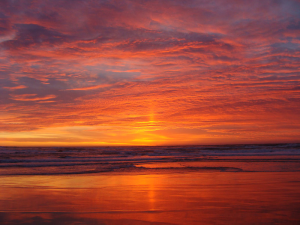

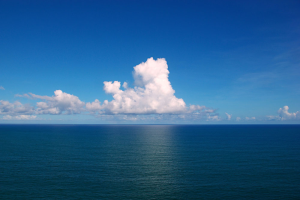

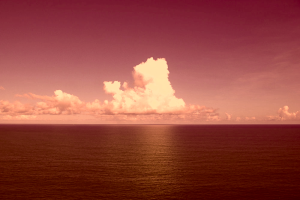

-1

In [14]:
def color_transfer(source, target):
	# convert the images from the RGB to L*ab* color space, being
	# sure to utilizing the floating point data type (note: OpenCV
	# expects floats to be 32-bit, so use that instead of 64-bit)
	source = cv2.cvtColor(source, cv2.COLOR_BGR2LAB).astype("float32")
	target = cv2.cvtColor(target, cv2.COLOR_BGR2LAB).astype("float32")
  	# compute color statistics for the source and target images
	(lMeanSrc, lStdSrc, aMeanSrc, aStdSrc, bMeanSrc, bStdSrc) = image_stats(source)
	(lMeanTar, lStdTar, aMeanTar, aStdTar, bMeanTar, bStdTar) = image_stats(target)
 
	# subtract the means from the target image
	(l, a, b) = cv2.split(target)
	l -= lMeanTar
	a -= aMeanTar
	b -= bMeanTar
 
	# scale by the standard deviations
	l = (lStdTar / lStdSrc) * l
	a = (aStdTar / aStdSrc) * a
	b = (bStdTar / bStdSrc) * b
 
	# add in the source mean
	l += lMeanSrc
	a += aMeanSrc
	b += bMeanSrc
 
	# clip the pixel intensities to [0, 255] if they fall outside
	# this range
	l = np.clip(l, 0, 255)
	a = np.clip(a, 0, 255)
	b = np.clip(b, 0, 255)
 
	# merge the channels together and convert back to the RGB color
	# space, being sure to utilize the 8-bit unsigned integer data
	# type
	transfer = cv2.merge([l, a, b])
	transfer = cv2.cvtColor(transfer.astype("uint8"), cv2.COLOR_LAB2BGR)
	
	# return the color transferred image
	return transfer

def image_stats(image):
	# compute the mean and standard deviation of each channel
	(l, a, b) = cv2.split(image)
	(lMean, lStd) = (l.mean(), l.std())
	(aMean, aStd) = (a.mean(), a.std())
	(bMean, bStd) = (b.mean(), b.std())
 
	# return the color statistics
	return (lMean, lStd, aMean, aStd, bMean, bStd)
 
def show_image(title, image, width = 300):
	# resize the image to have a constant width, just to
	# make displaying the images take up less screen real
	# estate
	r = width / float(image.shape[1])
	dim = (width, int(image.shape[0] * r))
	resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)

	# show the resized image
	cv2_imshow(resized)
 
source = cv2.imread("ocean_sunset.jpg") #image is from same directory
target = cv2.imread("ocean_day.jpg")

# transfer the color distribution from the source image
# to the target image
transfer = color_transfer(source, target)

# show the images and wait for a key press
show_image("Source", source)
show_image("Target", target)
show_image("Transfer", transfer)
cv2.waitKey(0)